# The Factors behind The Price of Housing in King County
### Wenkai Fu - 1005787347
### Feb 6th, 2022

# Introduction
As a university student who has not yet entered the workforce, it is necessary to understand what factors can influence the price of a house. It is due to the price of the house directly contributing to the level of stress we will face in life. So this analysis is designed to __help people choose a more cost-effective home while meeting their needs__. Thus, the research question of the analysis is that __what are some factors that greatly correlate with the price of housing__.

In this analysis, the main message will be analyzed into two parts, the first part(project 1) is to explore how the factors of the house greatly correlate with the price of housing **statistically**, while the second part(project 2) aims to develop the relationship between housing price and factors of the house **geographically**.

The dataset that supports the analysis in project 1 is *House Sales in King County, USA*, which is published by Harlfoxem in 2017. The dataset records the house sale prices and several house indicators for King County between May 2014 and May 2015. The outcome is **the price of the house**, which is a numerical variable, and the price is in US dollars. Furthermore, the explanatory variables are the **number of bedrooms**, **the number of bathrooms** and **the living area of the house**. The reason why I choose these indicators is that these indicators are the most basic and relevant to life. Moreover, controlling the number of important indicators and filtering unimportant variables can reduce the variance of the prediction. Note that these independent variables are all numerical. The 0.5 for the number of bathrooms means a room with a toilet but no shower. 

There are 4 datasets(3 external datasets) to help analyze the relationship between factors and the price of houses geographically in project 2. They are *House Sales in King County, USA*, *US Counties shapefile*, *King County subdivisions shapefile* and *Zipcode shapefile in King County*. Except for the data set analyzed in project 1, the rest three datasets contain shape information under different geographical levels (counties, county subdivisions and Zipcode separately). Furthermore, for the *House Sale in King County* dataset, in addition to the variables selected in project 1, I added the **latitude and longitude** of each house for analysis. Latitude and longitude are continuous numerical variables.

Last but not the least, I hypothesize that the __living area__ of the house has a strong positive relationship with the __price__ of the house statistically and geographically.

<div style="page-break-after: always;"></div>

# Project 1

In [217]:
# Import packages
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Import data
df = pd.read_csv(r'/Users/fuwenkai/Documents/U of T/ECO225/ECO225 Project/Data/kc_house_data.csv')
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

## Summary Statistics
### Data Cleaning
After importing the dataset from the Kaggle website, it is important to clean the dataset. Since the response variable and the explanatory variables are already selected previously. It is helpful to clean the dataset by selecting the practical variables from the raw dataset. After that, removing invalid observations is also critical. It makes the analysis more precise and reliable. According to common sense, the number of bedrooms, bathrooms and the living area should not be 0. Therefore, we need to remove these unconventional observations.

In [219]:
# Cleaning process
useful_col = ['price',
             'bedrooms',
             'bathrooms',
             'sqft_living']
df_clean = df[useful_col] # Select useful columns

df_clean = df_clean.drop(df_clean[df_clean.bedrooms == 0].index)
df_clean = df_clean.drop(df_clean[df_clean.bathrooms == 0].index)

df_clean = df_clean.dropna().reset_index()
df_clean

index     price  bedrooms  bathrooms  sqft_living
0          0  221900.0         3       1.00         1180
1          1  538000.0         3       2.25         2570
2          2  180000.0         2       1.00          770
3          3  604000.0         4       3.00         1960
4          4  510000.0         3       2.00         1680
...      ...       ...       ...        ...          ...
21592  21608  360000.0         3       2.50         1530
21593  21609  400000.0         4       2.50         2310
21594  21610  402101.0         2       0.75         1020
21595  21611  400000.0         3       2.50         1600
21596  21612  325000.0         2       0.75         1020

[21597 rows x 5 columns]

The table above shows the cleaned dataset after the cleaning processes that are presented previously. The cleaned dataset has four variables, one response variable(Price) and three explanatory variables(The number of bedrooms, bathrooms and the living area). Besides, compared with the raw dataset that owns 21613 observations, the cleaned dataset now contains 21597 observations, 16 invalid observations are removed.

### Statistics Summary

In [220]:
# Summary statistics for the outcome(Y)
df_clean["price"].describe()

count    2.159700e+04
mean     5.402029e+05
std      3.671337e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

For housing prices, the statistical summary is described above. As you can see, the difference between prices is significant, with the most expensive prices of $7.7*10^6$, which is more than 14 times the average housing price. The standard deviation of prices is about $3.67 * 10^5$, which is large and means that the distribution of housing prices is very dispersed.

In [221]:
# Summary statistics for the explantory variables(X)
df_clean[["bedrooms", "bathrooms", "sqft_living"]].describe()

bedrooms     bathrooms   sqft_living
count  21597.000000  21597.000000  21597.000000
mean       3.373200      2.115826   2080.321850
std        0.926299      0.768984    918.106125
min        1.000000      0.500000    370.000000
25%        3.000000      1.750000   1430.000000
50%        3.000000      2.250000   1910.000000
75%        4.000000      2.500000   2550.000000
max       33.000000      8.000000  13540.000000

This table contains the statistics of three explanatory variables. On average, the number of bedrooms of houses is about 3.37, the number of bathrooms is 2.12 approximately, and the living area of houses is about 2080.32 sqft. What can be observed is that the differences between the data are very large and include outliers. For instance, the maximum value of the number of bedrooms is 33, which is nearly ten times the average. Furthermore, the distribution of the number of bedrooms witnesses a right-skewed pattern since the median(50% quantile = 3) is less than the mean(3.37) value. Similarly, the distribution of living area has a right-skewed patten as well, because the median(1910 sqft) is less than the mean value(2080.32 sqft). Conversely, the median(2.25) of the number of bathrooms is similar to the mean(2.12), so the distribution is likely to be symmetric.

In [222]:
df_clean.dtypes

index            int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

By looking at the type of variables, we can determine a suitable graphical summary of the corresponding variable. For float(continuous numerical variable), the histogram is very useful. For integer(discrete numerical variable), the boxplot can be practical.

### Graphical Summary

In [223]:
# Remove the outlier for the housing price
iqr = 645000 - 322000
out_range = [322000-(1.5*iqr), 645000 + (1.5*iqr)]

prices = []
for y in df_clean["price"]:
    if y <= out_range[1]:
        prices.append(y)
        
prices

# Create a new dataframe that contains price information without outlier
p_wit = pd.DataFrame(prices, columns = ['price'])
p_wit

price
0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
...         ...
20447  360000.0
20448  400000.0
20449  402101.0
20450  400000.0
20451  325000.0

[20452 rows x 1 columns]

To graph the price of the house, clearing the outlier is very important, and here I use the 1.5 IQR range rule to define the outlier. The table above shows the housing prices in King County after removing the outlier.

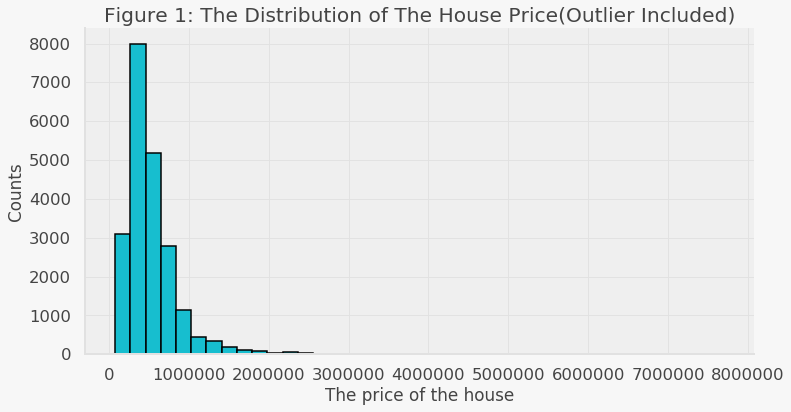

In [224]:
# Plot the histogram of the outcome Y, the price of the house.
bgcolor = (250/255, 250/255, 250/255)
p_hist = df_clean.hist(column = "price",
              grid = True,
              figsize = (12, 6), 
              bins = 40,
              orientation = "vertical",
              color = "tab:cyan",
             ec = "black");
plt.title('Figure 1: The Distribution of The House Price(Outlier Included)')
plt.xlabel('The price of the house')
plt.ylabel('Counts');

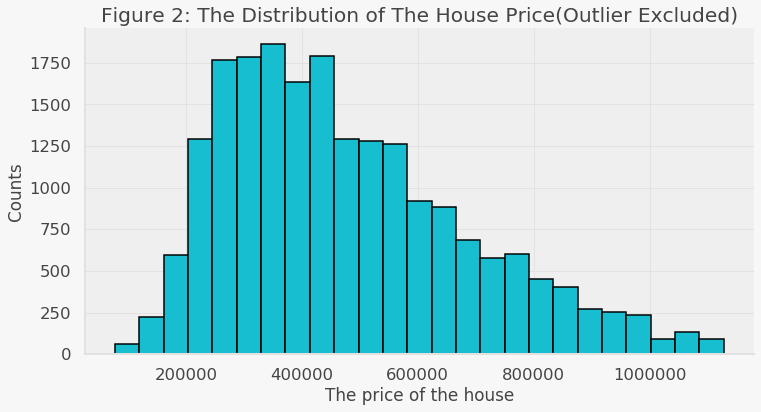

In [225]:
# Plot the histogram of the outcome without outlier
p_hist1 = p_wit.hist(column = 'price',
                    grid = True,
                    figsize = (12, 6),
                    bins = 25,
                    orientation = "vertical",
                    color = "tab:cyan",
                    ec = "black");
plt.title('Figure 2: The Distribution of The House Price(Outlier Excluded)')
plt.xlabel('The price of the house')
plt.ylabel('Counts')
plt.rcParams['axes.facecolor'] = bgcolor;

Figures 1 and 2 show the distribution of the house price. By comparing these two graphs, it is clear that Figure 2 shows the distribution of housing prices more clearly. This also shows that outlier has a very big impact on the data. The house price is the outcome of the analysis. The histogram follows a right-skewed pattern, which validates our analysis in the statistics summary. And it is a unimodal distribution with a center of 400000 approximately. Moreover, most house prices are located between 200000 and 800000 US dollars.

In [226]:
# Clean the outlier for bedrooms
new_i = 0
for i in range (0, df_clean['bedrooms'].count()):
    if df_clean['index'][i] == 15870:
        new_i = i
df_clean.drop(new_i, axis = 0, inplace = True)

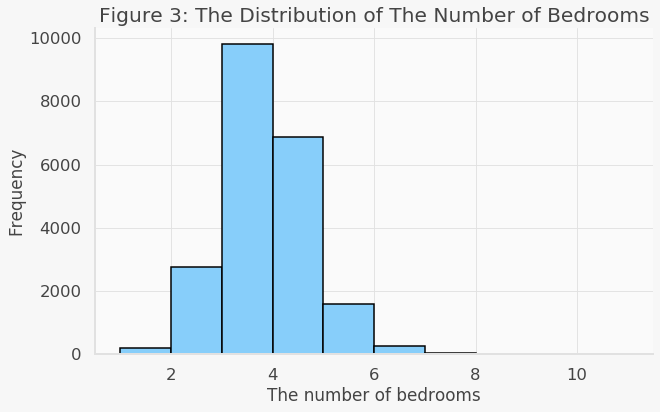

In [227]:
# Plot the histogram of the first X, the number of bedrooms of the house.
fig, ax = plt.subplots(figsize = (10,6))
bgcolor = (250/255, 250/255, 250/255)
df_clean.plot(
    kind="hist", 
    y="bedrooms", 
    color= "lightskyblue",
    legend=False, 
    ec = "black",
    grid = True,
    ax=ax
)
ax.set_title("Figure 3: The Distribution of The Number of Bedrooms")
ax.set_xlabel("The number of bedrooms")
ax.set_facecolor(bgcolor)

Figure 3 describes the distribution of the number of bedrooms of houses in King County. The histogram follows a slight right-skewed pattern. Moreover, most house owns several bedrooms between 3 and 5. Note that the minimum number of bedrooms is 1, and the maximum value has been removed as an outlier.

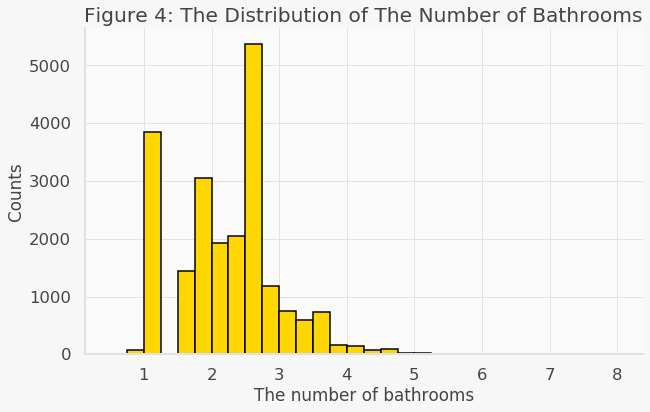

In [228]:
# Plot the histogram of the second X, the number of bathrooms of the house.
bat_hist = df_clean.hist(column='bathrooms',
        grid=True,
        figsize=(10, 6),
        bins=30,
        orientation='vertical',
        color='gold',
        ec = "black");
plt.title("Figure 4: The Distribution of The Number of Bathrooms")
plt.xlabel("The number of bathrooms")
plt.rcParams['axes.facecolor'] = bgcolor
plt.ylabel("Counts");

Figure 3 above shows the distribution of the number of house bathrooms. The histogram is approximately symmetrical with a center of about 2.5. It is a bimodal distribution where the peaks are 1.25 and 2.75 separately. Plus, the most number of bathrooms in the house is under 3.

In [229]:
# Remove the outlier for living area
ind = []
new_i = 0
for i, value in zip(range(0, df_clean['sqft_living'].count()), df_clean['sqft_living']):
    #print(i, value)
    if value > 8000:
        ind.append(i)
ind
df_clean2 = df_clean.drop(ind, axis = 0)

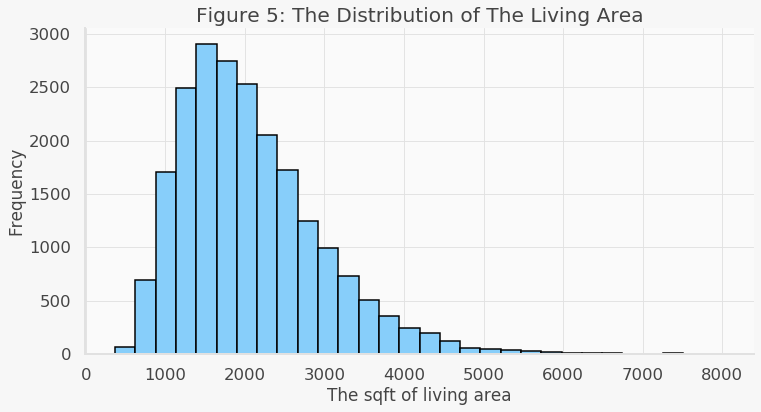

In [230]:
# Plot the histogram of the first X, the number of bedrooms of the house.
fig, ax = plt.subplots(figsize = (12,6))
bgcolor = (250/255, 250/255, 250/255)
df_clean2.plot(
    kind="hist", 
    y="sqft_living", 
    color= "lightskyblue",
    bins = 30,
    legend=False, 
    ec = "black",
    grid = True,
    ax=ax
)
ax.set_title("Figure 5: The Distribution of The Living Area")
ax.set_xlabel("The sqft of living area")
ax.set_facecolor(bgcolor)

Figure 6 shows how the living area of the house is distributed. The reason we don't use __1.5*IQR outlier range__ is that the living area of the house is assigned by tier, if we remove those observations above the range, we will miss a lot of information. The living area has a right-skewed and unimodal pattern, which means the mean value will be larger than the median. And the most living area of houses is between 1000 and 3000 sqft in King County.

## Part 2

In this part, the basic information regarding the independent and dependent(housing price) variables such as distribution will be displayed. The **main message** of this part is to **explore the factors of the house that greatly correlate with the price of housing statistically**.

In [231]:
# Clean the outliers for both bedrooms and prices
df_clean1 = df_clean.drop(df_clean[df_clean.price > out_range[1]].index)
df_clean1 = df_clean1.reset_index().drop(['level_0','index'], 1)
df_clean1

price  bedrooms  bathrooms  sqft_living
0      221900.0         3       1.00         1180
1      538000.0         3       2.25         2570
2      180000.0         2       1.00          770
3      604000.0         4       3.00         1960
4      510000.0         3       2.00         1680
...         ...       ...        ...          ...
20446  360000.0         3       2.50         1530
20447  400000.0         4       2.50         2310
20448  402101.0         2       0.75         1020
20449  400000.0         3       2.50         1600
20450  325000.0         2       0.75         1020

[20451 rows x 4 columns]

Now we study the distribution of both prices(outcome) and the number of bedrooms(independent variable). Since the number of bedrooms is a discrete numerical variable. It is worth analyzing to plot the outcome by subgroups. The table above contains the dataset after removing the outlier.

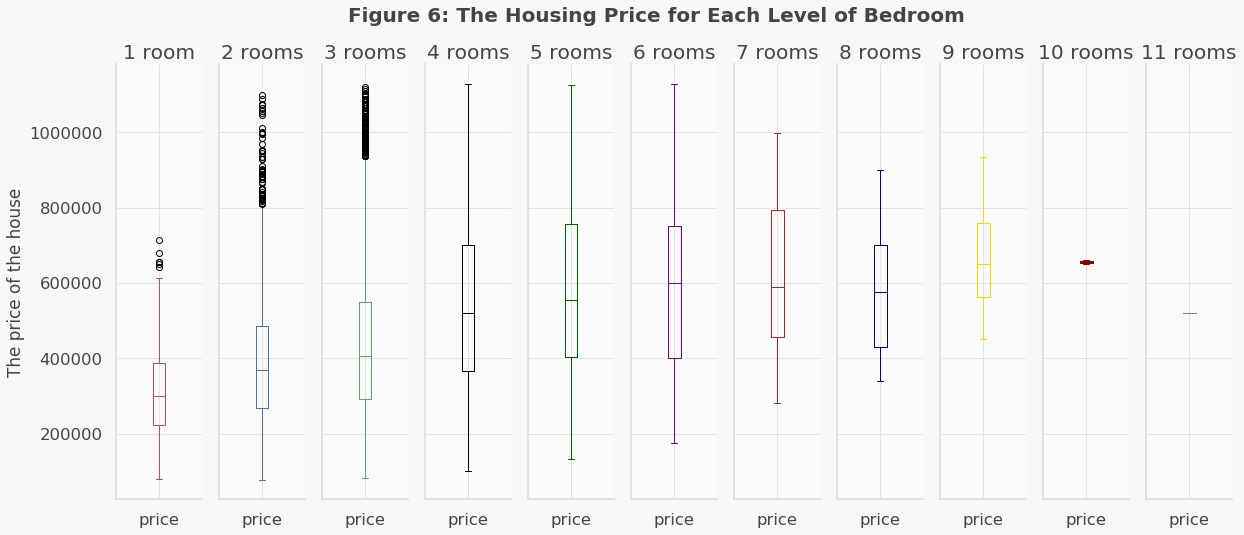

In [232]:
# Plot Y by subgroups (bedrooms)
def single_boxplot(df, num, ax, color):
    """
    This function create a boxplot of the number of bedroom at a specific level,
    
    """
    # Filter data to keep only the data of interest
    _df = df.query("(bedrooms == @num)")
    _df.plot(
        kind="box", y="price", ax=ax, color=color
    )

    return ax

# Create initial plot
number = [i for i in range(1,12)]
fig, ax = plt.subplots(1,11,figsize=(20, 8), sharey=True)

colors = ['r', 'b', 'g', 'black', 'darkgreen', 'purple',
          'brown','darkblue', 'gold', 'darkred', 'gray']

for (i, num) in enumerate(number):
    if i == 0:
        single_boxplot(df_clean1, num, ax[i], colors[i])
        ax[i].set_title(str(num)+' room')
        ax[i].set_ylabel("The price of the house")
    else:
        single_boxplot(df_clean1, num, ax[i], colors[i])
        ax[i].set_title(str(num)+' rooms')
        ax[i].set_ylabel("The price of the house")

plt.suptitle("Figure 6: The Housing Price for Each Level of Bedroom", 
             fontweight = "bold",
             fontsize = 20);

Figure 6 illustrates the housing price under a different number of bedrooms by using boxplots. The y-axis is the price of the house while the x-axis explains the housing price under different levels of bedrooms. Eleven distinctive colours are used to distinguish the boxplots. It is clear to observe that the average value of housing prices rises with the number of rooms, except for the number of 10 rooms and 11 rooms. This is due to the small size of ten and eleven room numbers. Moreover, the lower limit of housing is getting higher since the 25% quantile is higher. Furthermore, as the number of rooms increases, the prices become more concentrated, which means that the variance of housing prices decreases. Therefore, based on these boxplots and our **main message** for this section, the housing price is positively related to the number of bedrooms.

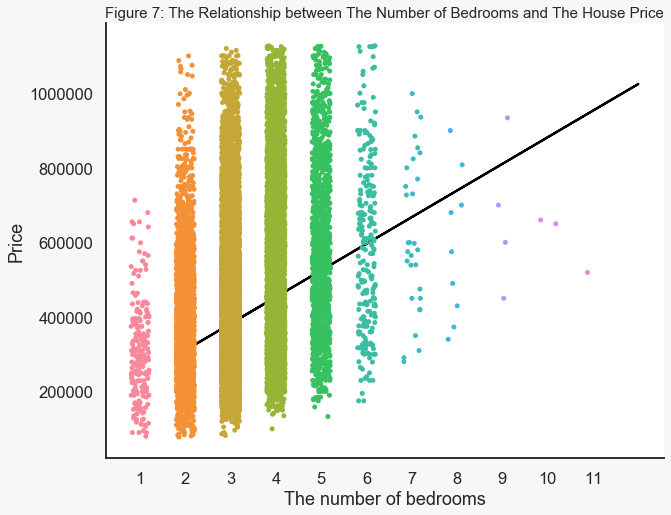

In [233]:
# Plot the jitter plot for the bedrooms and prices
plt.figure(figsize=(10, 8));
x = df_clean1['bedrooms']
y = df_clean1['price']
sns.set(style='white', context='talk')

sns.stripplot(x, 
              y, 
              data=df_clean1,
              jitter=0.2)
sns.despine()

# Add regression line
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b, color = "black")
plt.title('Figure 7: The Relationship between The Number of Bedrooms and The House Price',
         fontsize = 15)
plt.xlabel('The number of bedrooms')
plt.ylabel('Price');

Figure 7 is a scatter plot with a jitter method that represents the relationship between the number of bedrooms(x-axis) and the house price(y-axis) in King County. Common sense dictates that the bedroom should be the place in a house where people spend the most time, so it is important to understand the number of bedrooms concerning the price of the house, which can help consumers cost-effectively maximize their utility. The brown dots represent the housing price and their corresponding number of bedrooms. 

The black line is the regression line that is generated by the dataset. It is easy to observe that there is a moderate positive relationship between house price and the number of bedrooms since the slope of the regression line is not steep. Moreover, we can observe that the density of housing price for the corresponding number of bedrooms decreases as the price or the number of bedrooms increases. Eleven different colours are used to distinguish a different number of bedrooms.

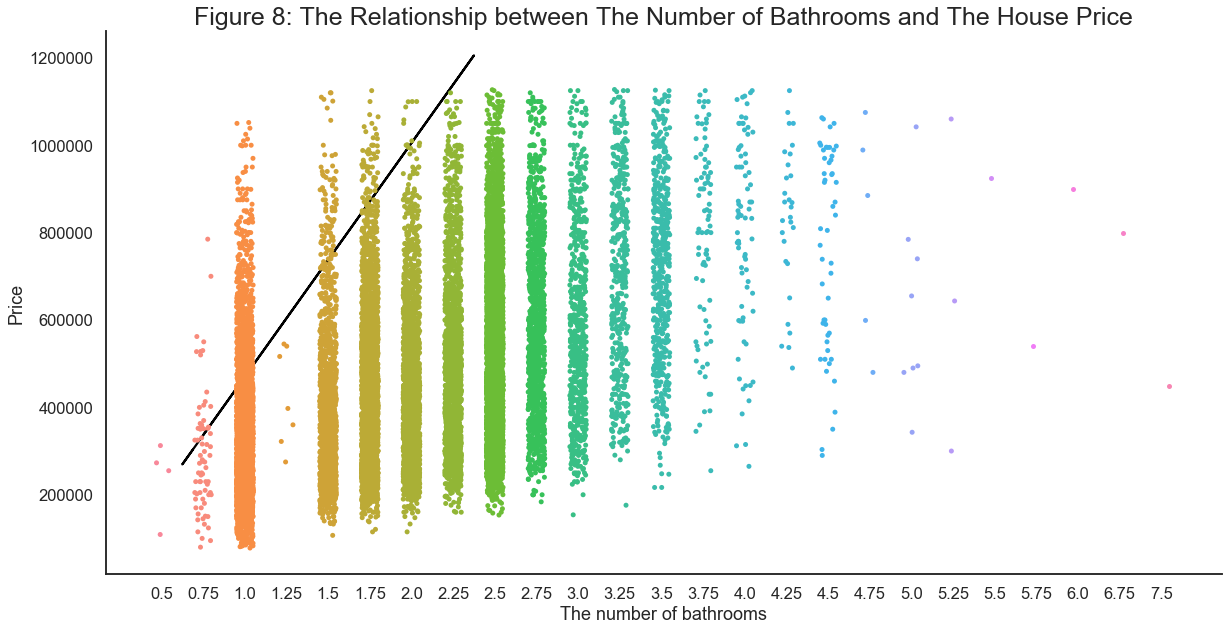

In [234]:
# Plot the jitter plot for bathrooms and prices
plt.figure(figsize=(20, 10));
x = df_clean1.bathrooms
y = df_clean1.price
sns.set(style='white', context='talk')

sns.stripplot(x, 
              y, 
              data=df_clean1,
              jitter=0.2)
sns.despine()

# Add regression line
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b, color = "black")
plt.title('Figure 8: The Relationship between The Number of Bathrooms and The House Price',
         fontsize = 25)
plt.xlabel('The number of bathrooms')
plt.ylabel('Price')
plt.show();

Similarly, figure 8 illustrates the relationship between the housing price and the number of bathrooms. Bathrooms are also an essential part of the house, so studying the relationship between the number of bathrooms and the price of the house is also essential to help consumers meet their utility maximization bundle of price and quantity. The green dots represent the price of the house corresponding to the number of bathrooms. What can be observed is that the slope of this regression line is a little steeper than the slope of the line in Figure 5. Therefore, compared with the number of bedrooms, the number of bathrooms has a stronger positive correlation with the housing price. 

Plus, It can be seen that the density of the scatter plot is the lowest when the number of bathrooms is 0.5, 1.25 and greater than 5 bathrooms, which means that the house sells very little at these numbers of bathrooms. As usual, different colours are used to distinguish the different number of bathrooms in the plot.

<Figure size 576x792 with 0 Axes>

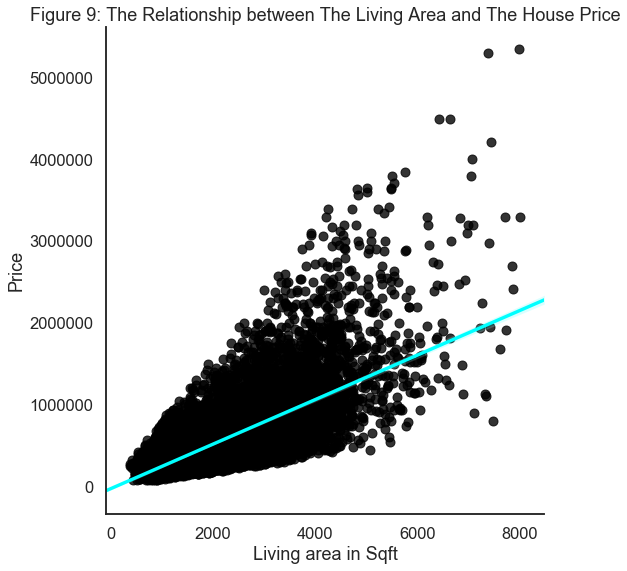

In [235]:
# Plot the relationship between the living area and the price of house.
plt.figure(figsize=(8, 11))
rel_x3 = sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = df_clean2,
           scatter = True,
           fit_reg = True,
           line_kws = {'color': 'aqua'},
           scatter_kws = {'color': 'black'},
           height = 8);

plt.title('Figure 9: The Relationship between The Living Area and The House Price');
plt.xlabel('Living area in Sqft');
plt.ylabel('Price');

Lastly, Figure 9 demonstrates how the living area and housing price are related. These two variables are the hypotheses in this piece. This should be the most intuitive relationship, the price of the house will be closely related to the area. From the diagram, the black dot represents the price of the house corresponding to the living area. And the blue regression line tells that there is a strong positive correlation between the living area and the housing price. Furthermore, it is easy to see that this scatterplot has a fan-out pattern. Compared with the previous two independent variables, the correlation of the living area with the price is significantly higher.

## Project 2

In this part, geographical information regarding the dataset will be provided. The **main message** of this part is to find out **how the independent factors correlate with the housing price from the geographical location**. That is the impact of the geographical location factor on the price of housing and useful independent variables(As analyzed in project 1).

## Dataset Preparation

In [236]:
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

### Import External Datasets

In [237]:
# US counties files and select useful information
US = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip")
US = US[['STATEFP', 'COUNTYFP', 'NAME', 'INTPTLAT', 'INTPTLON', 'geometry']]
US

STATEFP COUNTYFP       NAME     INTPTLAT      INTPTLON  \
0         31      039     Cuming  +41.9158651  -096.7885168   
1         53      069  Wahkiakum  +46.2946377  -123.4244583   
2         35      011    De Baca  +34.3592729  -104.3686961   
3         31      109  Lancaster  +40.7835474  -096.6886584   
4         31      129   Nuckolls  +40.1764918  -098.0468422   
...      ...      ...        ...          ...           ...   
3228      13      123     Gilmer  +34.6905055  -084.4546244   
3229      27      135     Roseau  +48.7610683  -095.8215042   
3230      28      089    Madison  +32.6343703  -090.0341603   
3231      48      227     Howard  +32.3034298  -101.4387208   
3232      54      099      Wayne  +38.1436416  -082.4226659   

                                               geometry  
0     POLYGON ((-97.01952 42.00410, -97.01952 42.004...  
1     POLYGON ((-123.43639 46.23820, -123.44759 46.2...  
2     POLYGON ((-104.56739 33.99757, -104.56772 33.9...  
3     POLYGON ((-96.91075 40.78494, -96.91075 40.790...  
4     POLYGON ((-98.27367 40.08940, -98.27367 40.089...  
...                                                 ...  
3228  POLYGON ((-84.65478 34.66559, -84.65488 34.669...  
3229  POLYGON ((-96.40466 48.80528, -96.40467 48.813...  
3230  POLYGON ((-90.09363 32.70763, -90.09360 32.707...  
3231  POLYGON ((-101.69227 32.27106, -101.69221 32.2...  
3232  POLYGON ((-82.59529 38.36978, -82.59515 38.369...  

[3233 rows x 6 columns]

The dataset above records the information of each state in the USA. It includes the FIPS for each county, as well as various geographical location information such as latitude and longitude corresponding to it. The most important thing is that it includes the shape information of counties in the USA, which is very helpful for us to map the house sale in King County, DC. The dataset comes from the US census website.

In [238]:
### US counties subdivision files, and filter the useful county subdivisions
county_sub = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2018/COUSUB/tl_2018_53_cousub.zip")
county_sub = county_sub.drop(county_sub[county_sub.COUNTYFP != '033'].index)
county_sub = county_sub[['STATEFP', 'COUNTYFP', 'NAME', 'INTPTLAT', 'INTPTLON', 'geometry']]
county_sub

STATEFP COUNTYFP                 NAME     INTPTLAT      INTPTLON  \
30      53      033   Federal Way-Auburn  +47.3108067  -122.2918823   
31      53      033     Issaquah Plateau  +47.5380758  -121.9909137   
32      53      033              Seattle  +47.5644713  -122.3269383   
33      53      033    Snoqualmie Valley  +47.6056140  -121.5678153   
34      53      033  Tahoma-Maple Valley  +47.4117874  -122.0052616   
73      53      033         Seattle East  +47.6257794  -122.1304319   
74      53      033        Vashon Island  +47.4111909  -122.4551051   
75      53      033     Enumclaw Plateau  +47.2591793  -121.7356735   

                                             geometry  
30  POLYGON ((-122.43725 47.33372, -122.42924 47.3...  
31  POLYGON ((-122.09847 47.59193, -122.09832 47.5...  
32  POLYGON ((-122.46985 47.52820, -122.46859 47.5...  
33  POLYGON ((-122.01498 47.73715, -122.01497 47.7...  
34  POLYGON ((-122.16554 47.34893, -122.16553 47.3...  
73  POLYGON ((-122.27414 47.74502, -122.27204 47.7...  
74  POLYGON ((-122.54166 47.34919, -122.54139 47.3...  
75  POLYGON ((-122.21006 47.32759, -122.20972 47.3...

This dataset illustrates the county subdivisions information of each county. After cleaning and filtering, the dataset contains eight county subdivisions attached with their position and shape information in King County. In discussing geographic location, I will rely primarily on county subdivisions. Similarly, the dataset comes from the US census website.

In [239]:
### US zipcode file and select useful information
king_zip = gpd.read_file('https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson')
king_zip = king_zip.drop(king_zip[king_zip.COUNTY_NAME != 'King County'].index)
king_zip = king_zip[['ZIP', 'COUNTY_NAME', 'geometry']]
king_zip

ZIP  COUNTY_NAME                                           geometry
0    98001  King County  POLYGON ((-122.29061 47.35539, -122.29061 47.3...
1    98002  King County  POLYGON ((-122.22921 47.35375, -122.22992 47.3...
2    98003  King County  POLYGON ((-122.30300 47.35745, -122.30393 47.3...
3    98004  King County  POLYGON ((-122.21195 47.64642, -122.21191 47.6...
4    98005  King County  POLYGON ((-122.15354 47.66056, -122.15358 47.6...
..     ...          ...                                                ...
100  98199  King County  POLYGON ((-122.39473 47.66466, -122.39652 47.6...
108  98224  King County  POLYGON ((-121.36426 47.78010, -121.36427 47.7...
118  98288  King County  POLYGON ((-121.32460 47.78004, -121.33522 47.7...
147  98354  King County  POLYGON ((-122.31646 47.26461, -122.31782 47.2...
181  98422  King County  MULTIPOLYGON (((-122.33174 47.26089, -122.3323...

[87 rows x 3 columns]

The Zipcode dataset above explains the zipcode and their corresponding shape information in King County. As it can tell, there are 87 distinct regions after screening the dataset. In the process of drawing the map, we will merge this dataset with our house sale dataset based on Zipcode in King County. This dataset comes from King County GIS Open Data.

### Update Our Own Dataset

In [240]:
# Create coordinate for house location in the dataset
df["Coordinates"] = list(zip(df.long, df.lat))
df["Coordinates"] = df["Coordinates"].apply(Point)
useful_col = ['price',
             'bedrooms',
             'bathrooms',
             'sqft_living',
             'zipcode', 
             'lat','long','Coordinates']
df = df[useful_col]
df.head().style.set_caption('House Sale in King County').set_table_styles([{
    'selector': 'caption','props': [('color', 'black'),
        ('font-size', '16px')]}])

In the analysis of project 1, our dataset contains only one dependent variable and the three independent variables that are most closely associated with the dependent variable. To reach our main message for this section, we now need to add some geolocation information, specifically, we add the Zipcode of the house and the latitude and longitude. Moreover, the coordinate of houses is also created for use when drawing maps.

### Merging Datasets

In [241]:
# Merge the zip shapefile and my dataset(housing sale dataset)

# Unify the type of zip code
z = list(king_zip['ZIP'])
for i in range(len(z)):
    z[i] = float(z[i])
king_zip['ZIP'] = z

# Group the dataset by zipcode and calculate the mean value of price in each districts
gbz = df.groupby("zipcode")
mean_gbz = gbz.mean()
mean_gbz

# Merge data by zipcode
housesale = mean_gbz.merge(king_zip, left_on = 'zipcode', right_on = 'ZIP', how = 'inner')
housesale

price  bedrooms  bathrooms  sqft_living        lat        long  \
0   2.808047e+05  3.383978   2.006215  1900.856354  47.309020 -122.270646   
1   2.342840e+05  3.326633   1.839196  1627.743719  47.308780 -122.213357   
2   2.941113e+05  3.357143   2.047321  1928.882143  47.315741 -122.310054   
3   1.355927e+06  3.854890   2.527603  2909.022082  47.616183 -122.205189   
4   8.101649e+05  3.851190   2.424107  2656.803571  47.611532 -122.167268   
..           ...       ...        ...          ...        ...         ...   
65  6.761854e+05  3.396078   2.100000  2323.333333  47.742381 -122.369282   
66  3.106128e+05  3.305344   1.731870  1729.351145  47.499118 -122.246969   
67  2.890783e+05  3.433824   1.863971  1802.772059  47.447310 -122.280993   
68  3.028789e+05  3.182143   1.788393  1745.360714  47.390788 -122.315743   
69  7.918208e+05  3.211356   2.167981  2161.798107  47.648098 -122.398461   

        ZIP  COUNTY_NAME                                           geometry  
0   98001.0  King County  POLYGON ((-122.29061 47.35539, -122.29061 47.3...  
1   98002.0  King County  POLYGON ((-122.22921 47.35375, -122.22992 47.3...  
2   98003.0  King County  POLYGON ((-122.30300 47.35745, -122.30393 47.3...  
3   98004.0  King County  POLYGON ((-122.21195 47.64642, -122.21191 47.6...  
4   98005.0  King County  POLYGON ((-122.15354 47.66056, -122.15358 47.6...  
..      ...          ...                                                ...  
65  98177.0  King County  POLYGON ((-122.42587 47.77808, -122.42632 47.7...  
66  98178.0  King County  POLYGON ((-122.22167 47.51296, -122.22173 47.5...  
67  98188.0  King County  POLYGON ((-122.24998 47.47418, -122.25019 47.4...  
68  98198.0  King County  POLYGON ((-122.32097 47.42326, -122.32144 47.4...  
69  98199.0  King County  POLYGON ((-122.39473 47.66466, -122.39652 47.6...  

[70 rows x 9 columns]

The "house sale" dataset above is a merged dataset based on the **House Sale dataset in King County** and the **Zipcode shapefile in King County**. Firstly, I group the House Sale dataset by zipcode and calculate the mean value for the dependent variable and independent variables using GroupBy methods. After that, I merge these two datasets by common Zipcode. There are 70 different Zipcodes in the new House Sale dataset, which means there is some data missing because of the bias between the zipcode of the two datasets. The map in the next section is mainly based on this dataset, and the geographic level is Zip code.

## Map Summary

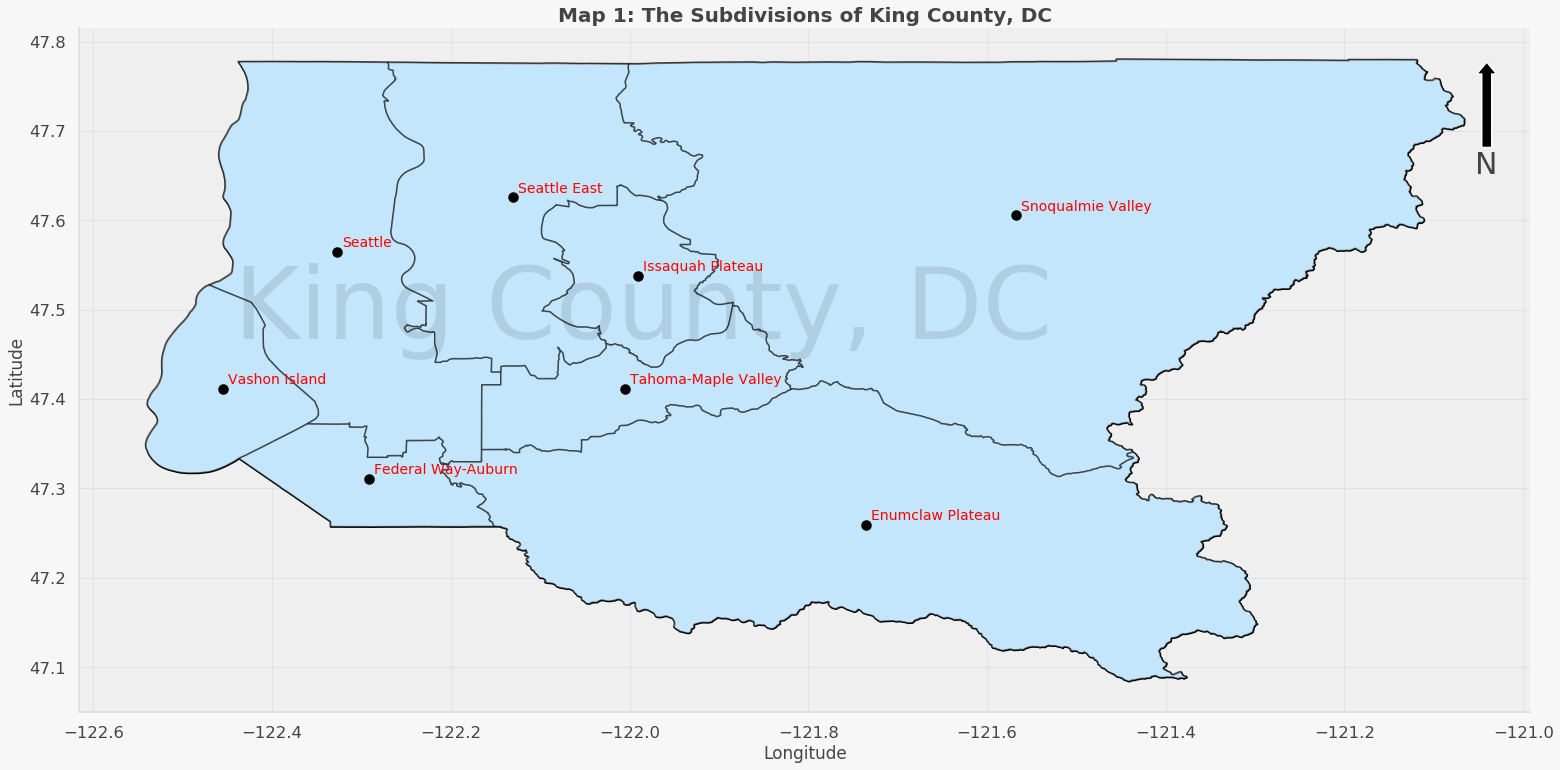

In [242]:
# Get the map
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "lightskyblue",
                                                    alpha = 1);

# Graph the county subdivisions
county_sub.plot(ax = gax,
                edgecolor = "black",
                color = 'white',
                alpha = 0.5)

# Annotate the name of the county
gax.annotate('King County, DC', 
             xy=(0.15, 0.56), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.1,
             size = 100)

# Plot central point of county subdivisions
lat_l = list(county_sub.INTPTLAT)
for i in range(len(lat_l)):
    lat_l[i] = float(lat_l[i])

lon_l = list(county_sub.INTPTLON)
for i in range(len(lon_l)):
    lon_l[i] = float(lon_l[i])

county_sub["Coordinates"] = list(zip(lon_l, lat_l))
county_sub["Coordinates"] = county_sub["Coordinates"].apply(Point)
gcou_sub = gpd.GeoDataFrame(county_sub, geometry = 'Coordinates')
gcou_sub.plot(ax = gax, color = "black", alpha = 1)

# Add names to subdivisions
for x, y, label in zip(gcou_sub['Coordinates'].x, gcou_sub['Coordinates'].y, gcou_sub['NAME']):
    gax.annotate(label, 
                 xy = (x,y), 
                 xytext = (5,5), 
                 textcoords = 'offset points',
                 color = 'red')

# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 1: The Subdivisions of King County, DC", size = 20, fontweight = "bold");

Map 1 above explains the geolocation and shape of King County and eight county subdivisions. The central location and the name of each county subdivision are clearly labelled on the map. From the map, we can observe that the Snoqualmie Valley and Enumclaw Plateau share the largest part of King County. Moreover, Vashon Island, Federal Way-Auburn and Issaquah Plateau account for the smallest area of the county. And the area of the remaining three is similar to each other. __Note that the county zoning is only used to distinguish between home sales in each area, not the geographic level of the map__.

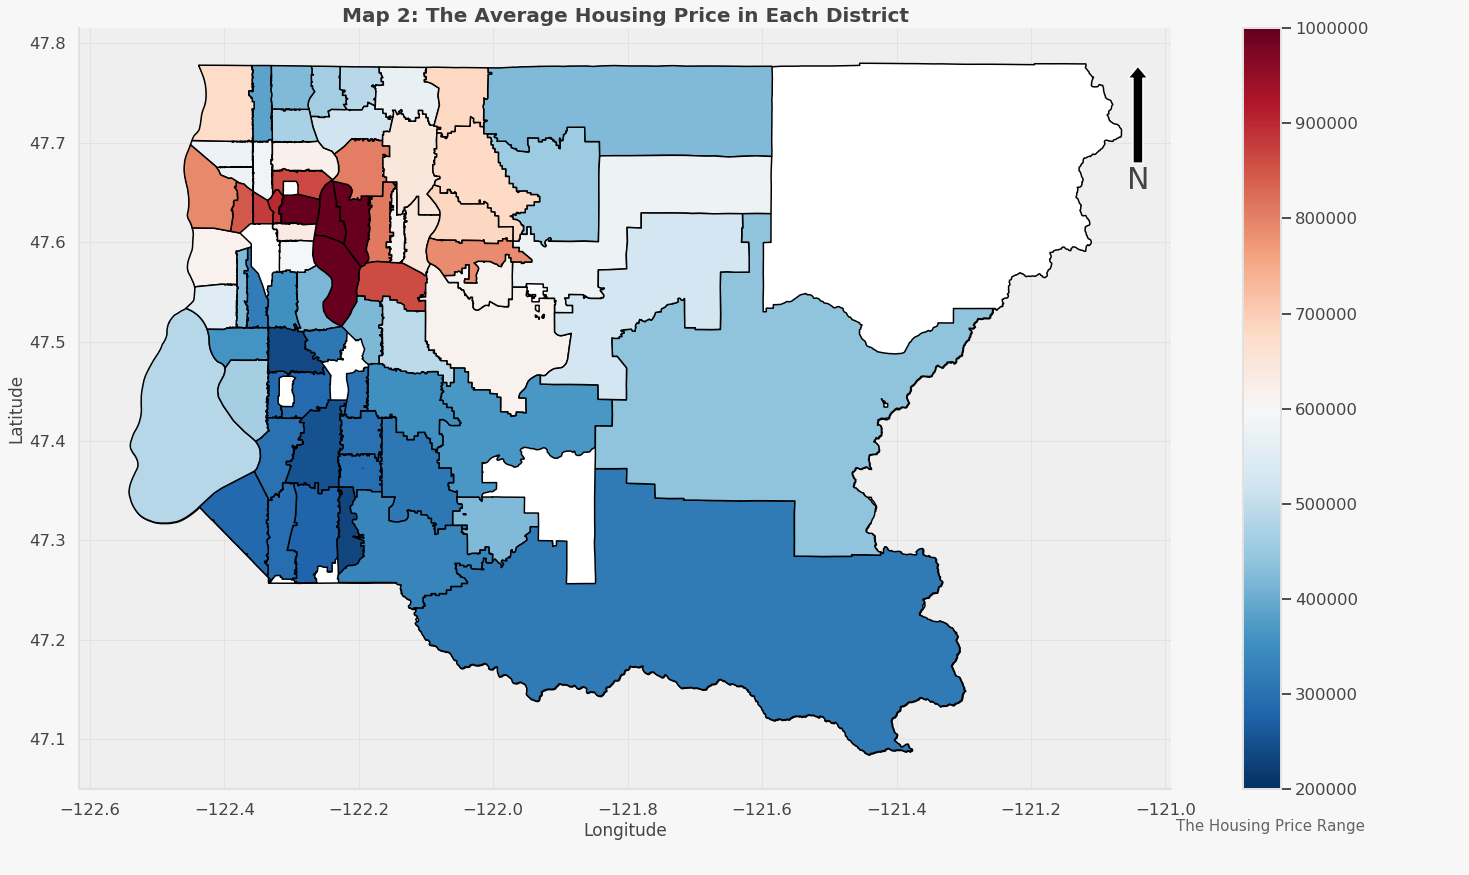

In [243]:
# The map regarding to dependent variable housing price
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
housesale = gpd.GeoDataFrame(housesale, geometry = 'geometry')
housesale.plot(ax = gax, edgecolor='black', column='price', legend=True, cmap='RdBu_r',
               vmin=200000, vmax=1000000)



# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Housing Price Range', 
             xy=(0.8, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 2: The Average Housing Price in Each District", 
              size = 20, fontweight = "bold");

Map 2 is a heat map and reflects the average housing price(Dependent Variable) in each district by Zipcode. The price of houses ranges from 200,000 to 1,000,000 US dollars. If the price is closer to 1,000,000, then the area is redder and closer to 200,000 is bluer. From the heat plot, areas located in the northwest part of the county will have higher prices than other locations. Looking back at map 1, we can easily see that these high housing prices are located in **Seattle**, **Seattle East** and **Issaquah Plateau**. Besides, areas located in the south of King County have relatively lower prices than the north. Similarly, from map 1, houses in **Vashon Island**, **Federal Way-Auburn** and **Enumclaw Plateau** have a relatively low price. 

In the following section, I will develop the relationship between Xs and Y by analyzing the **number of bedrooms** and the **living area** in the same region. These two independent variables are chosen because one is a discrete variable and the other is a continuous variable. Also, I believe that bedrooms are the most important part of a house, and the price of a house should be most closely related to the size of a room. Plus, the living area variable is in our hypothesis.

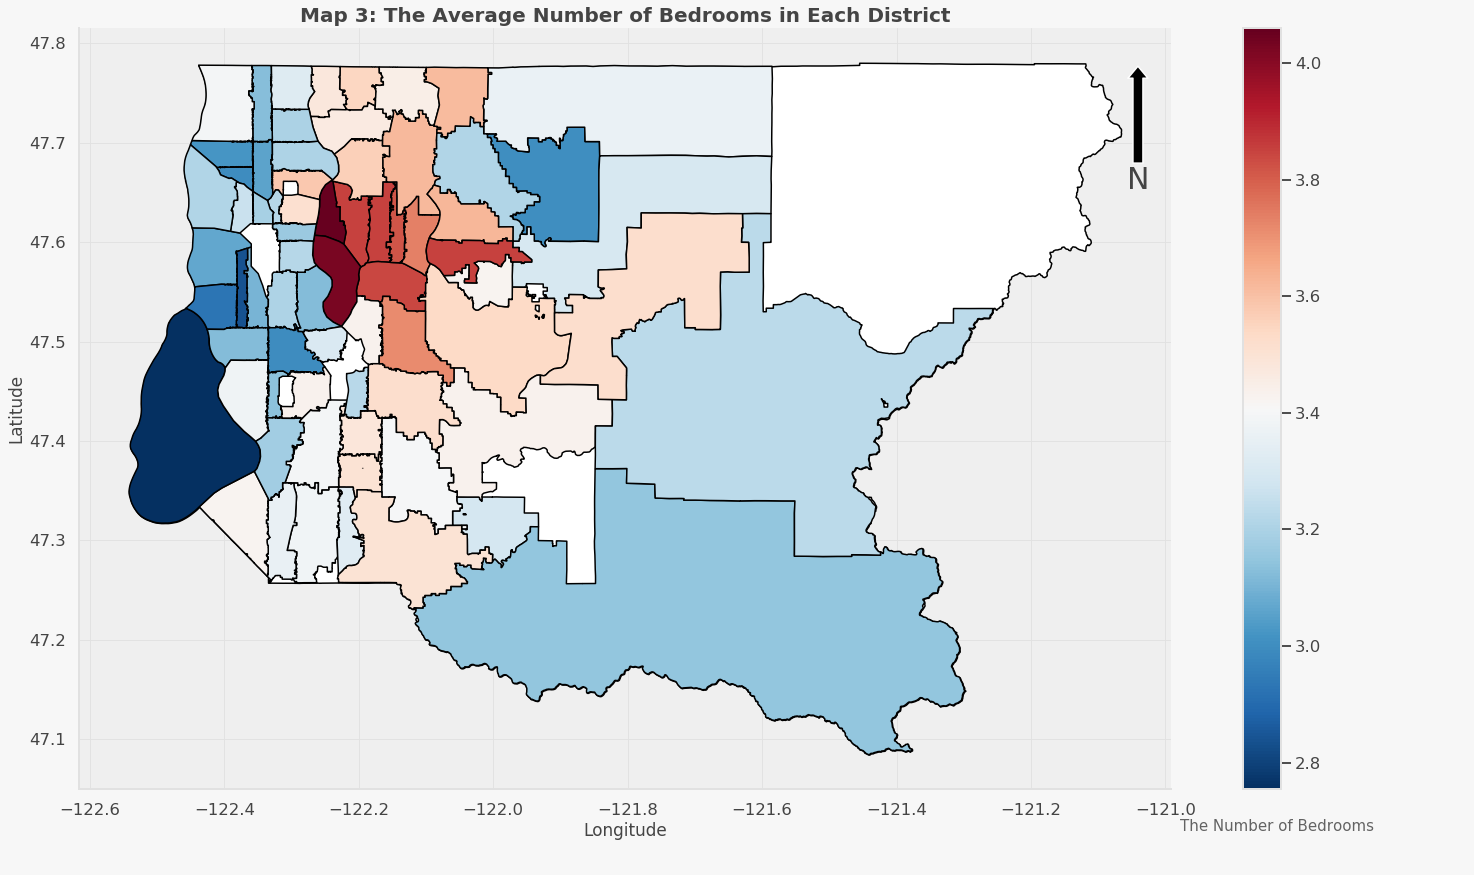

In [244]:
# The map regarding to the first independent variable the number of bedrooms
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
housesale = gpd.GeoDataFrame(housesale, geometry = 'geometry')
housesale.plot(ax = gax, edgecolor='black', column='bedrooms', 
               legend=True, cmap='RdBu_r',
               vmin=housesale['bedrooms'].min(), vmax=housesale['bedrooms'].max())

# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Number of Bedrooms', 
             xy=(0.8, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 3: The Average Number of Bedrooms in Each District",
              size = 20, fontweight = "bold");

Map 3 describes the average number of bedrooms(The first independent variable) in each region by Zipcode. Similarly, map 3 is a heat map and has the same colour pattern as map 2. The average number of bedrooms ranges from 2.75 to 4 approximately. The house in the northwest regions of the map has more bedrooms. Specifically, houses in **Seattle**, **Seattle East**, **Issaquah Plateau** and **Tahoma-Maple Valley** contain relatively more bedrooms. However, the average number of bedrooms in **Vashon Island** is extremely low about 2.8. By comparing map 2 and map 3, which is the **dependent variable(housing price)** map and the **first independent variable(the number of bedrooms)** map, there are similar findings in project 1. The average housing price is relatively high in Seattle, Seattle East and Issaquah Plateau, and the number of bedrooms is more in Seattle, Seattle East, Issaquah Plateau and Tahoma-Maple Valley. In Seattle, Seattle East and Issaquah Plateau, the number of bedrooms and the price of the houses are very high, which demonstrates a **positive association** between bedrooms and houses.

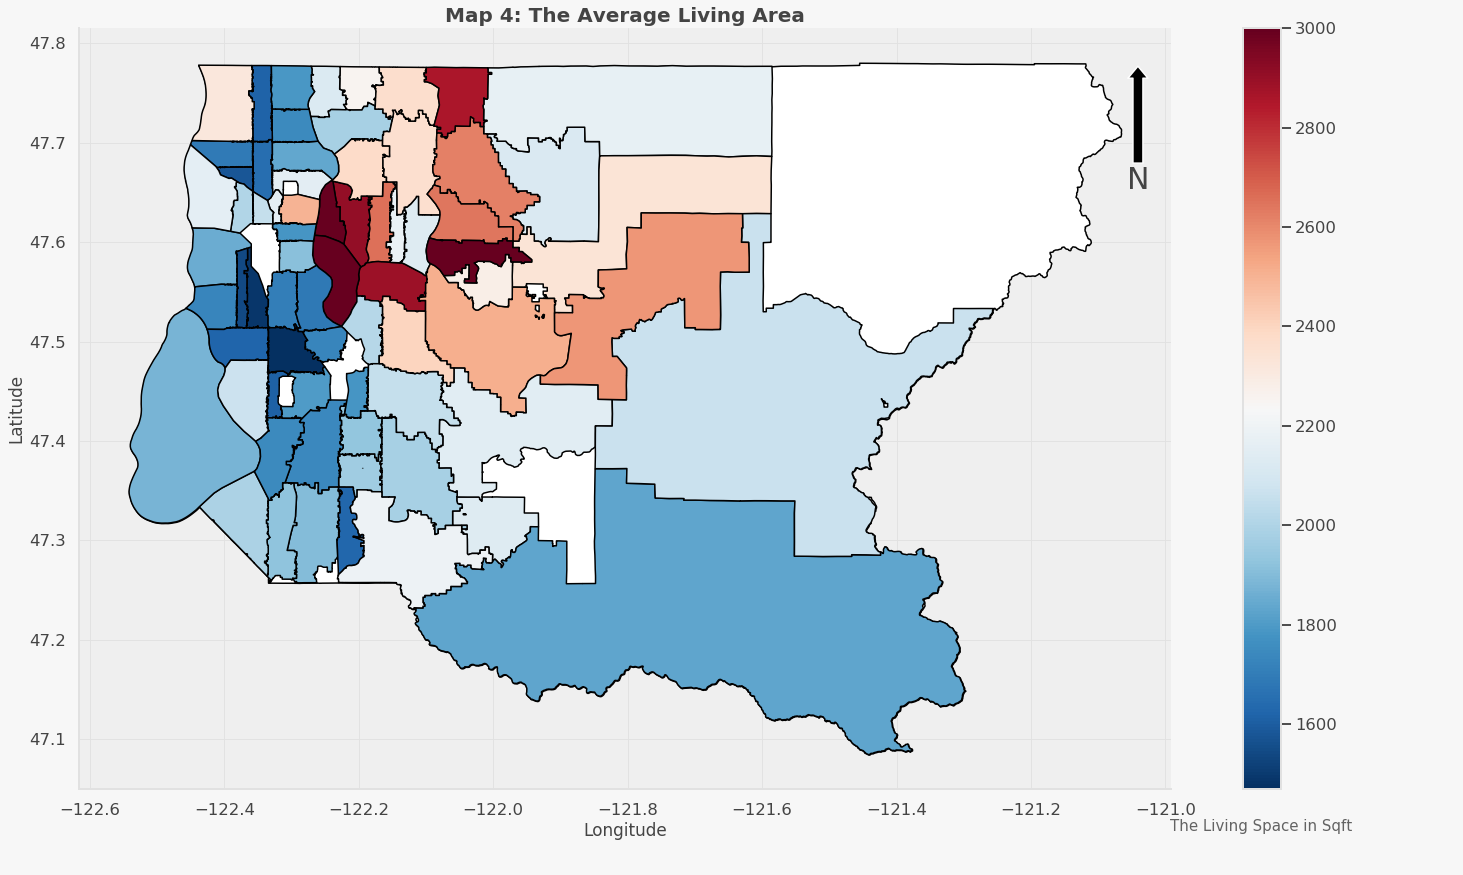

In [245]:
# The map regarding to the third independent variable (the living area)
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
housesale = gpd.GeoDataFrame(housesale, geometry = 'geometry')
housesale.plot(ax = gax, edgecolor='black', column='sqft_living', 
               legend=True, cmap='RdBu_r',
               vmin=housesale['sqft_living'].min(), vmax=3000)

# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Living Space in Sqft', 
             xy=(0.8, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 4: The Average Living Area", 
              size = 20, fontweight = "bold");

Map 4 shows the average living area(The third independent variable) of each region in King County by Zipcode. Map 4 is a heat map with a range of living spaces from 1468 sqft to 3000 sqft. As can be observed, the northeast region is more red compared with other blue regions, which means the average living area in the northeast is relatively larger than other regions. From map 1, we can tell that houses in **Seattle, Seattle East, Issaquah Plateau and Tahoma-Maple Valley** have a relatively larger living zoom. And houses in **Vashon Island, Federal Way-Auburn and Enumclaw Plateau** have a smaller living area. Comparing the living area and housing price of the same area, we can find that the area with large living area and the area with high housing prices are almost overlapped. This means that in King County, there is a **positive correlation** between the price of a home and the square footage of living space. It is worth mentioning that we found a similar relationship in the scatterplot of project 1.

### Interactive Map

In [246]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer, Spectral8
from bokeh.palettes import brewer
output_notebook()
import json
hs_geojson=GeoJSONDataSource(geojson=housesale.to_json())

Loading BokehJS ...

In [247]:
color_mapper = LinearColorMapper(palette = Spectral8, low = 200000, high = 1000000)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('Zipcode','@ZIP'),('Average Housing Price', '@price'),
                               ('Average Num of Bedrooms','@bedrooms'),
                               ('Average Living Space','@sqft_living')])
p = figure(title="House Price In King County", tools=[hover])
p.patches("xs","ys",source = hs_geojson,
          fill_color = {'field' :'price', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

This is a interactive plot that contains the Zipcode, average housing price, average number of bedrooms and the average living space of the house for each region.

# Conclusion

In conclusion, for project 1, the dataset that supports the analysis is published by Harlfoxem on the Kaggle website in 2017. The purpose of this part of the analysis is to examine the factors that correlate with the price of the house statistically, so it can help consumers maximize their utilities within their budget constraints. 

For project 2, datasets that help the analysis are the house sale dataset and shapefiles of US counties, King County subdivisions and Zip code. And the goal for this part is to develop the relationship between the housing price and house factors geographically. Lastly, the analysis hypothesizes that the living area has a strong relationship with the price of the house statistically and geographically. 

To answer the research question and to test the hypothesis analyzed in this project. The __scatterplot__, the __regression line__ and __heat maps__ are the main methods to explore the research question. In project 1, I picked the three variables most closely connected to the price of the house according to common sense, the number of bedrooms, the number of bathrooms, and the living area. As a result, the correlation between living area and price is the highest, while the correlation between the number of bedrooms and price is the lowest based on the slope of the regression line. This proves that the first part of the hypothesis is correct.

In project 2, I compare the heat map of the housing price with the heat map of the number of bedrooms and the living area based on the same region by King County subdivisions. The result is that the number of bedrooms and living area both trend positively with the price of the house on the map. So the second part of the hypothesis is correct as well. Therefore, the hypothesis of the analysis: **the living area has a strong positive relationship with the housing price both statistically and geographically** is correct.

# Drawbacks and Future Steps

Inevitably, this analysis also has its drawbacks. First of all, the dataset was recorded only for the housing information in King County, USA, which led to some randomness in the results of the analysis. And it is unable to predict the factors that affect the housing price in other provinces or countries around the world. Second, since we have not yet learned model selection, we cannot include more variables at this time. Besides, when I merge the dataset in project 2, several Zipcodes does not match each other due to the dataset bias.

In the future, for project 1, I will look for similar data sets from more regions to do my analysis, preferably from regions around the world, which makes my analysis representative and reliable. Moreover, I will include more explanatory variables, and do the model selection to select the variables that affect the housing price the most. For project 2, I will add more external datasets that contain geographical information such as the number of schools in each region.

# Bibliography
1. Kaggle.com. 2022. House Sales in King County, USA. [online] Available at: <https://www.kaggle.com/harlfoxem/housesalesprediction> [Accessed 6 February 2022].
2. pagebreak in markdown while creating pdf. (2022). Retrieved 6 February 2022, from https://stackoverflow.com/questions/22601053/pagebreak-in-markdown-while-creating-pdf
3. Seppänen, J. (2022). How do you change the size of figures drawn with Matplotlib?. Retrieved 6 February 2022, from https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
4. plot, M. (2022). Matplotlib: avoiding overlapping datapoints in a "scatter/dot/beeswarm" plot. Retrieved 5 March 2022, from https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot/46802300#46802300
5. (2022). Retrieved 5 March 2022, from https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson
6. Census.gov. (2022). Retrieved 5 March 2022, from https://www.census.gov/